# 📖 Chapter 3: Fourier Transform and Frequency Domain


## 3.1 Time Domain vs Frequency Domain

- **Time Domain:**
    - Shows how the amplitude of a signal changes over time.
    - Example: Audio waveform (amplitude vs time).

- **Frequency Domain:**
    - Shows what frequencies are present in the signal and their strength.
    - Example: Audio spectrum (amplitude vs frequency).

**Summary:**
Time domain = When things happen
Frequency domain = What tones (pitches) are present

## 3.2 Introduction to Fourier Transform (FT)

- **Fourier Transform** converts a time-domain signal into a frequency-domain signal.
- It decomposes any signal into a sum of sine and cosine waves.

**Mathematical idea:**
Every signal can be represented as a weighted sum of simple sinusoids.

Continuous Fourier Transform (CFT) Formula:

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2\pi f t} \, dt
$$

where:
- **X(f)** is the Fourier Transform of \( x(t) \),
- **t** is time,
- **f** is frequency,
- **j** is the imaginary unit (j^2=-1)

## 3.3 Discrete Fourier Transform (DFT)

- In computers, we deal with **discrete** signals (finite samples).

- Discrete Fourier Transform (DFT) is the sampled version of the Fourier Transform.

**DFT Formula:**


$$X[k] = \sum{x[n]\exp^{-j\frac{2\pi}{N}kn}}$$

where:
- **N** = total number of samples
- **k** = index of frequency bin

## 3.4 Fast Fourier Transform (FFT)

- FFT is an algorithm to compute DFT very quickly.

- Reduces complexity from $O(N^2)$ to $O(NlogN)$

- Almost all real-world applications use FFT, not slow DFT.

**In Python:**
Use ``numpy.fft.fft()`` or ``scipy.fft.fft()`` for computing FFT.


## 3.5 Spectrograms (Short-Time Fourier Transform - STFT)

- **Spectrogram** = frequency content + how it changes over time.

- It's a 2D plot:
    - X-axis: time
    - Y-axis: frequency
    - Color/brightness: amplitude

- Created using **Short-Time Fourier Transform (STFT):**
    - Break signal into small overlapping chunks (windows).
    - Apply FFT to each chunk.

**In Python:**
Use ``scipy.signal.stft()`` or ``librosa.stft()`` to compute spectrograms.


## 🧪 Practical Exercises

### 📌 Exercise 1: Plot FFT of a Sine Wave

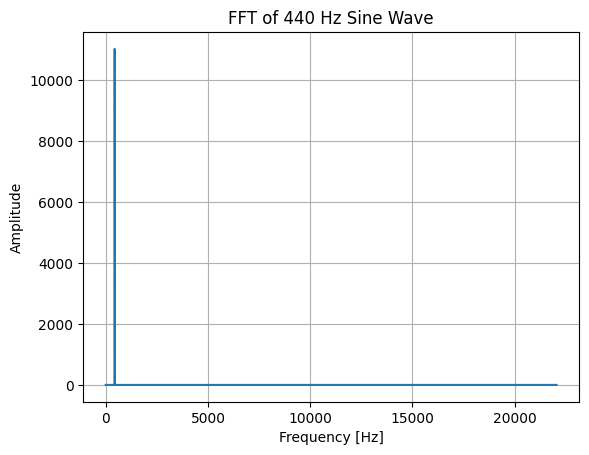

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave
frequency = 440  # Hz
sampling_rate = 44100  # Hz
duration = 1.0  # seconds

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
y = 0.5 * np.sin(2 * np.pi * frequency * t)

# Compute FFT
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(Y), 1/sampling_rate)

# Plot only positive frequencies
idx = np.where(frequencies >= 0)

plt.plot(frequencies[idx], np.abs(Y[idx]))
plt.title('FFT of 440 Hz Sine Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### 📌 Exercise 2: Generate and Plot a Spectrogram

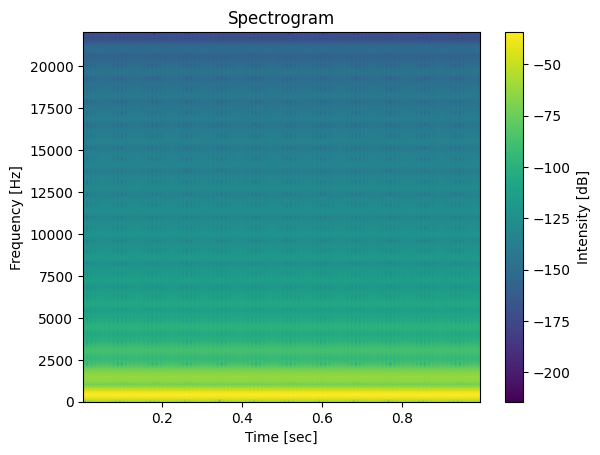

In [2]:
from scipy import signal

# Generate spectrogram
frequencies, times, Sxx = signal.spectrogram(y, sampling_rate)

# Plot
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()